Load the IMDb Dataset and Select First 1000 Rows

In [16]:
# Import required libraries
import pandas as pd

# Load the dataset
data_path = '/content/IMDB.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

df = df.head(2000)

# Check the shape to confirm selection
df.shape


(2000, 2)

Explanation:

The dataset contains IMDb reviews with two columns: 'review' (the text) and 'sentiment' (either positive or negative).
For the purpose of this analysis, we are restricting the data to the first 800 rows.


Preprocess the Text Data
Text data needs to be cleaned and transformed into numerical form before it can be fed into the neural network.

In [17]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Text cleaning function
def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Apply text cleaning
df['review'] = df['review'].apply(clean_text)

# Encode labels (1 for positive, 0 for negative)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on dataset size
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Check the shape of the vectorized data
X_train_vec.shape, X_test_vec.shape


((1600, 5000), (400, 5000))

Explanation:

Cleaning: The reviews are cleaned by removing HTML tags and punctuation, and converting them to lowercase.
Label Encoding: We convert the 'sentiment' labels to numeric values: 1 for positive and 0 for negative.
TF-IDF Vectorization: We use TF-IDF to convert the text data into numerical vectors of size 5000.

Define the ANN Model Architecture
We will define a neural network model with two hidden layers using the ReLU activation function and an output layer using the sigmoid activation function.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential()

# Input layer and first hidden layer with ReLU activation
model.add(Dense(128, input_shape=(X_train_vec.shape[1],), activation='relu'))
model.add(Dropout(0.3))

# Second hidden layer with ReLU activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Explanation:

Hidden Layers: The model has two hidden layers with 128 and 64 neurons respectively, both using ReLU activation.
Dropout: Dropout is applied to reduce overfitting by randomly setting some neurons to zero during training.
Output Layer: The output layer uses sigmoid activation, appropriate for binary classification.
Binary Cross-Entropy: The binary cross-entropy loss function is used for binary classification.

Train the Model
We will now train the model using the training data, and validate its performance on the test data.

In [19]:
# Train the model
history = model.fit(X_train_vec, y_train, epochs=10, batch_size=64, validation_data=(X_test_vec, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5595 - loss: 0.6896 - val_accuracy: 0.7775 - val_loss: 0.6611
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8564 - loss: 0.6171 - val_accuracy: 0.7625 - val_loss: 0.5256
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9104 - loss: 0.3902 - val_accuracy: 0.8500 - val_loss: 0.3668
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9666 - loss: 0.1628 - val_accuracy: 0.8600 - val_loss: 0.3195
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9939 - loss: 0.0620 - val_accuracy: 0.8675 - val_loss: 0.3306
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0273 - val_accuracy: 0.8650 - val_loss: 0.3511
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.8575 - val_loss: 0.3734
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9989 - loss: 0.0098 - val_accuracy: 0.8500 - v

Explanation:

Epochs: We are training the model for 10 epochs.
Batch Size: The training data is divided into batches of size 64.
Validation: The model's performance is evaluated on the test data after each epoch.


Evaluate the Model Performance
Now, let’s evaluate the model on the test data and visualize the training process.

In [20]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_vec, y_test)
print(f"Test Accuracy: {test_accuracy}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3791 
Test Accuracy: 0.8475000262260437


Plot the Loss Over Epochs
We will plot the training and validation loss to observe how the model's performance changes over time.


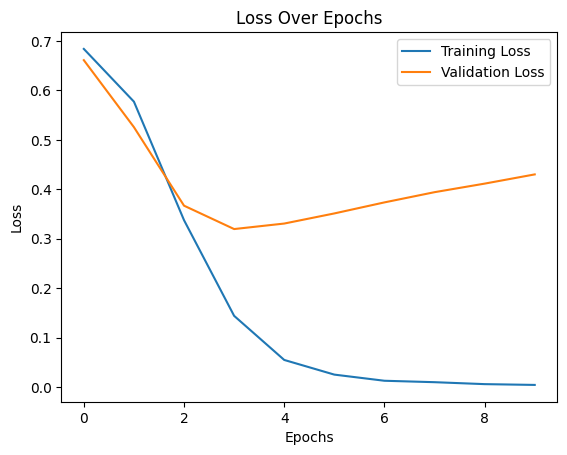

In [21]:
import matplotlib.pyplot as plt

# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


This plot will help visualize how the training and validation loss decrease over the epochs, providing insights into whether the model is overfitting or underfitting.

Conclusion
In this notebook, we performed sentiment analysis on a subset of the IMDb movie reviews dataset using an Artificial Neural Network (ANN). We used ReLU activation for hidden layers and sigmoid activation for the output layer, and the binary cross-entropy loss function to train the model. We also visualized the loss over epochs to monitor the training process.